# EDA Project speed dating

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [414]:
speed_dating = pd.read_csv("Speed Dating Data.csv", encoding='ISO-8859-1')

In [5]:
speed_dating

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5229,352,12,0,23,2,14,18,12,12.0,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5230,352,12,0,23,2,14,18,12,12.0,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5231,352,12,0,23,2,14,18,12,12.0,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5232,352,12,0,23,2,14,18,12,12.0,11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Doublons ?

In [38]:
speed_dating_2 = speed_dating[['iid','pid', 'gender']].copy()
a = speed_dating_2['iid'].apply(lambda x : str(x))
b = speed_dating_2['pid'].apply(lambda x : str(x))
speed_dating_2['iid_pid'] = a + '_' + b
#speed_dating[['iid','pid', 'gender']].groupby(['iid','pid']).sum().unique()

In [50]:
speed_dating_3 = speed_dating_2[['iid_pid', 'gender']].groupby(['iid_pid']).sum().reset_index()

In [53]:
speed_dating_3.describe(include = 'all')

,iid_pid,gender
count,5234,5234.000000
unique,5234,NaN
top,244_240.0,NaN
freq,1,NaN
mean,NaN,0.480894
std,NaN,0.499683
min,NaN,0.000000
25%,NaN,0.000000
50%,NaN,0.000000
75%,NaN,1.000000


count = unique, donc il n'y a pas de doublons (et aucun couple ne s'est rencontré plus d'une fois)
Par contre une ligne = une rencontre de deux personnes, donc on doit avoir beaucoup de 'doublons' vu que pour une ligne on aura le couple 'iid/pid' qui sera pour une autre ligne le couple 'pid/iid'.

## Suppression des doublons et création d'un nouveau dataframe + csv

In [63]:
sd_nb_lines = speed_dating.shape[0]
sd_nb_lines

5234

In [118]:
total_doublons = 0
speed_dating_doublons = pd.DataFrame()
for i in range(sd_nb_lines) :
    iid = speed_dating.iloc[i,0]
    pid = speed_dating.iloc[i,11]
    speed_dating_doublons = speed_dating_doublons.append(speed_dating.iloc[i:,:].loc[(speed_dating['iid'] == pid) & (speed_dating['pid'] == iid)])
    
speed_dating_doublons

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
100,11,1,1,2,1,1,10,7,NaN,4,...,7.0,8.0,7.0,7.0,5.0,NaN,NaN,NaN,NaN,NaN
110,12,2,1,4,1,1,10,7,NaN,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120,13,3,1,6,1,1,10,7,NaN,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
130,14,4,1,8,1,1,10,7,NaN,5,...,9.0,9.0,9.0,9.0,9.0,NaN,NaN,NaN,NaN,NaN
140,15,5,1,10,1,1,10,7,NaN,7,...,7.0,7.0,9.0,7.0,9.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4983,336,5,1,10,1,13,10,8,8.0,2,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
4993,337,6,1,12,1,13,10,8,8.0,9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5003,338,7,1,14,1,13,10,8,8.0,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5013,339,8,1,16,1,13,10,8,8.0,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [130]:
#df = pd.merge(speed_dating, speed_dating_doublons, how='outer')
#df

speed_dating_unique = pd.merge(speed_dating, speed_dating_doublons, how="outer", indicator=True)
speed_dating_unique = speed_dating_unique[speed_dating_unique['_merge'] == 'left_only']

In [131]:
speed_dating_unique.to_csv('speed_dating_uniques.csv')

## test heatmap matrix

In [133]:
corr = speed_dating.corr()

In [137]:
corr = corr.apply(lambda x : (x**2)**(1/2))

In [138]:


corr = corr.apply(lambda x : (x**2)**(1/2))

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
iid,1.000000,0.079146,0.010932,0.080982,0.154551,0.993747,0.195724,0.056906,0.032988,0.077200,...,0.055769,0.096371,0.037202,0.072166,0.021299,0.018159,0.002737,0.057569,0.172195,0.011534
id,0.079146,1.000000,0.006908,0.997618,0.329759,0.039117,0.366293,0.217377,0.227979,0.144845,...,0.020998,0.079994,0.036330,0.047770,0.013693,0.006015,0.169085,0.064411,0.071785,0.193402
gender,0.010932,0.006908,1.000000,0.041741,0.025226,0.069108,0.027046,0.006647,0.005116,0.010841,...,0.122915,0.105966,0.055641,0.184159,0.111127,0.333692,0.181867,0.055084,0.060105,0.056064
idg,0.080982,0.997618,0.041741,1.000000,0.334720,0.037621,0.379369,0.219464,0.231928,0.150023,...,0.017805,0.087408,0.036119,0.056600,0.018938,0.007758,0.180427,0.067308,0.068332,0.192955
condtn,0.154551,0.329759,0.025226,0.334720,1.000000,0.158255,0.873422,0.348050,0.323436,0.345525,...,0.126189,0.075606,0.135391,0.070127,0.004737,0.119295,0.092421,0.136437,0.221319,0.139928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
attr5_3,0.018159,0.006015,0.333692,0.007758,0.119295,0.079964,0.064889,0.085473,0.085473,0.028489,...,0.897522,0.202662,0.354431,0.338161,0.208865,1.000000,0.157083,0.385250,0.323389,0.272045
sinc5_3,0.002737,0.169085,0.181867,0.180427,0.092421,0.040156,0.165043,0.223296,0.223296,0.072461,...,0.109640,0.511296,0.369464,0.193885,0.129944,0.157083,1.000000,0.604032,0.250422,0.343895
intel5_3,0.057569,0.064411,0.055084,0.067308,0.136437,0.041978,0.037085,0.092492,0.092492,0.016282,...,0.316160,0.270054,0.701047,0.328033,0.272251,0.385250,0.604032,1.000000,0.436305,0.527244
fun5_3,0.172195,0.071785,0.060105,0.068332,0.221319,0.173233,0.098887,0.147264,0.147264,0.043416,...,0.338436,0.193559,0.511330,0.778311,0.371374,0.323389,0.250422,0.436305,1.000000,0.473833


<AxesSubplot:>

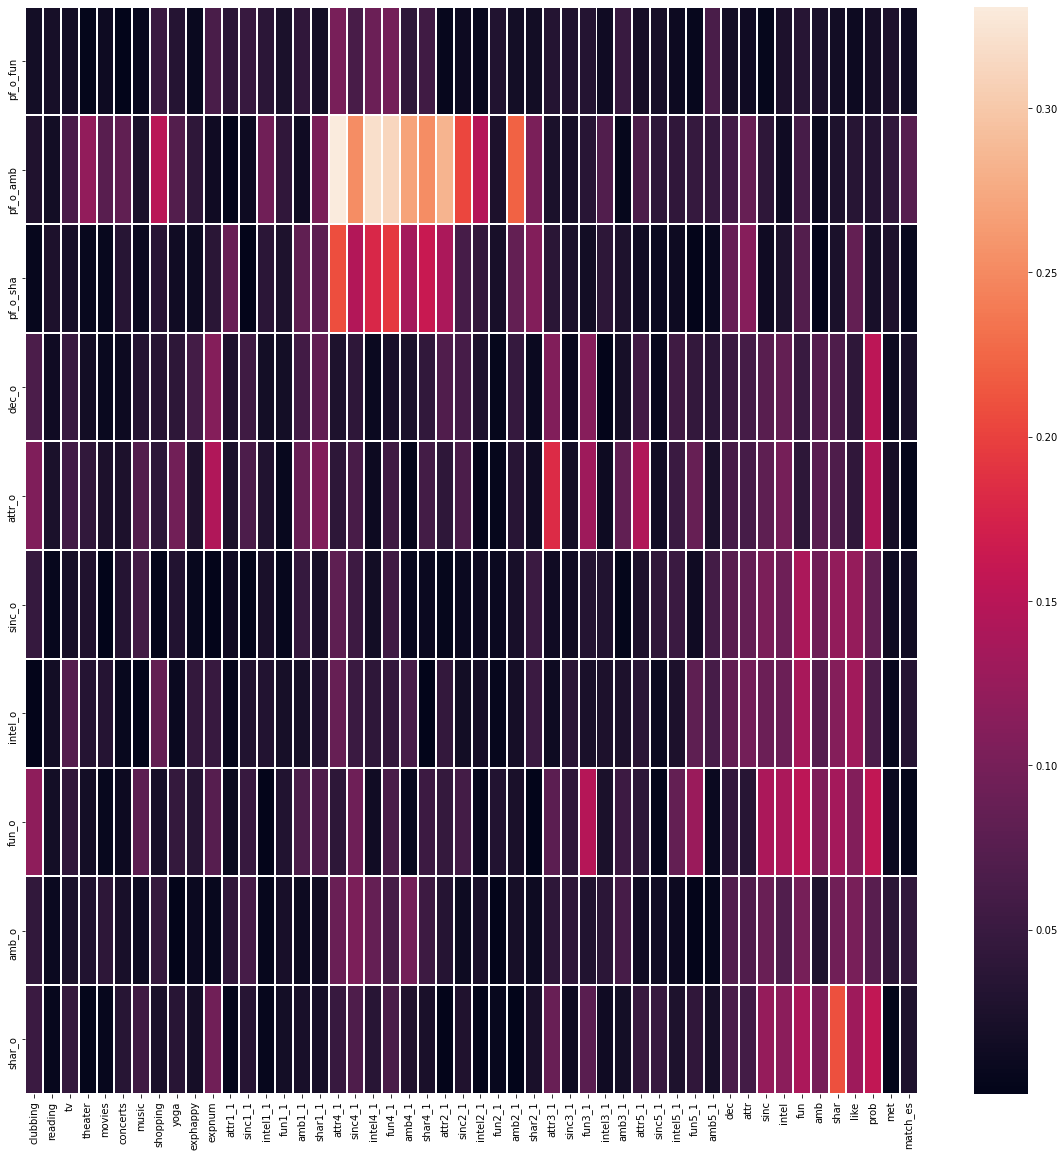

In [166]:

fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(corr.iloc[20:30,50:100], linewidths=1)

correlation bonne : 
- gender : shopping, théatre, musée

à continuer (automatiser pour extraire les données corrélées)

## Idées plots de base régression sur match

In [179]:
corr['match'].sort_values(ascending = False).iloc[0:20]

match       1.000000
dec_o       0.525531
dec         0.516342
like_o      0.307430
like        0.302479
fun_o       0.281275
shar_o      0.278732
fun         0.278718
shar        0.277261
attr_o      0.264177
prob        0.262678
prob_o      0.261228
attr        0.249719
them_cal    0.193998
intel_o     0.176812
sinc_o      0.172874
sinc        0.170901
intel       0.170639
num_in_3    0.156327
amb_o       0.152058
Name: match, dtype: float64

In [390]:
corr['dec'].sort_values(ascending = False).iloc[0:20]

dec         1.000000
like        0.522377
match       0.516342
attr        0.502959
fun         0.422684
shar        0.406344
prob        0.328231
match_es    0.250515
sinc        0.236653
intel       0.227804
satis_2     0.212191
amb         0.181230
num_in_3    0.170192
gender      0.156899
prob_o      0.151160
expnum      0.126247
exphappy    0.114180
imprace     0.111093
imprelig    0.108655
shar1_s     0.095487
Name: dec, dtype: float64

<AxesSubplot:xlabel='int_corr', ylabel='match'>

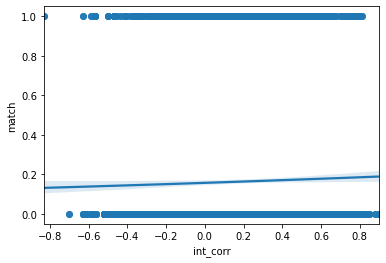

In [256]:
sns.regplot(x = 'int_corr', y = 'match', data = speed_dating, logistic = True)

<AxesSubplot:xlabel='int_corr', ylabel='match'>

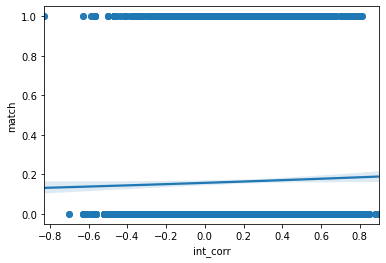

In [255]:
sns.regplot(x = 'int_corr', y = 'match', data = speed_dating, logistic = True)

In [223]:
speed_dating.income.isna().value_counts()

False    2752
True     2482
Name: income, dtype: int64

In [225]:
speed_dating.dec_o.isna().value_counts()

False    5233
True        1
Name: dec_o, dtype: int64

In [236]:
speed_dating_wo_income_na = speed_dating.dropna(subset = ['income']).dropna(subset = ['dec_o'])
speed_dating_wo_income_na

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5181,349,9,0,17,2,14,18,7,7.0,12,...,8.0,8.0,9.0,8.0,7.0,9.0,5.0,6.0,8.0,7.0
5182,349,9,0,17,2,14,18,7,7.0,8,...,8.0,8.0,9.0,8.0,7.0,9.0,5.0,6.0,8.0,7.0
5183,349,9,0,17,2,14,18,7,7.0,10,...,8.0,8.0,9.0,8.0,7.0,9.0,5.0,6.0,8.0,7.0
5184,349,9,0,17,2,14,18,7,7.0,17,...,8.0,8.0,9.0,8.0,7.0,9.0,5.0,6.0,8.0,7.0


In [249]:
speed_dating_wo_income_na.dec_o = speed_dating_wo_income_na.dec_o.apply(lambda x : int(x))
speed_dating_wo_income_na.income = speed_dating_wo_income_na.income.apply(lambda x : float(x.replace(',','')))

In [250]:
speed_dating_wo_income_na.income

0       69487.0
1       69487.0
2       69487.0
3       69487.0
4       69487.0
         ...   
5181    35963.0
5182    35963.0
5183    35963.0
5184    35963.0
5185    35963.0
Name: income, Length: 2752, dtype: float64

<AxesSubplot:xlabel='income', ylabel='dec_o'>

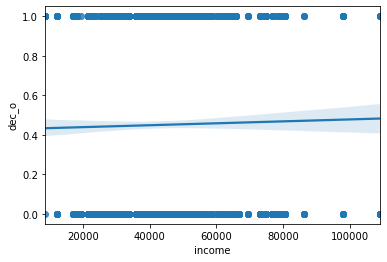

In [254]:
sns.regplot(x = 'income', y = 'dec_o', data = speed_dating_wo_income_na, logistic = True)

<AxesSubplot:xlabel='fun_o', ylabel='match'>

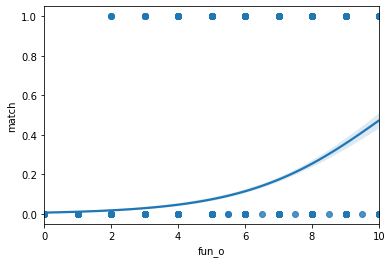

In [263]:
sns.regplot(x = 'fun_o', y = 'match', data = speed_dating, logistic = True)

<AxesSubplot:xlabel='fun_o', ylabel='dec_o'>

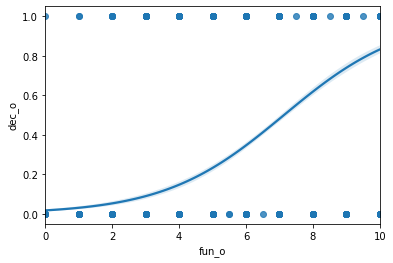

In [264]:
sns.regplot(x = 'fun_o', y = 'dec_o', data = speed_dating, logistic = True)

<AxesSubplot:xlabel='fun_o', ylabel='dec'>

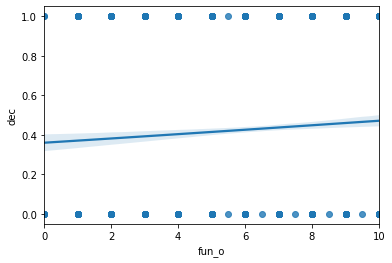

In [265]:
sns.regplot(x = 'fun_o', y = 'dec', data = speed_dating, logistic = True)

In [270]:
#sns.regplot(x = 'fun', y = 'fun_o', data = speed_dating, logistic = True)
speed_dating.fun

0       7.0
1       8.0
2       8.0
3       7.0
4       7.0
       ... 
5229    9.0
5230    9.0
5231    8.0
5232    7.0
5233    NaN
Name: fun, Length: 5234, dtype: float64

<AxesSubplot:xlabel='attr_o', ylabel='dec_o'>

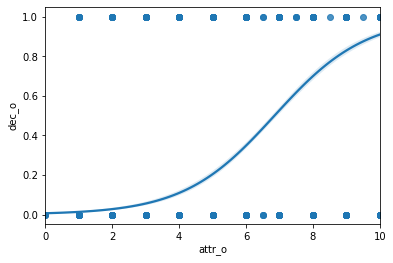

In [272]:
sns.regplot(x = 'attr_o', y = 'dec_o', data = speed_dating, logistic = True)

In [291]:
sd_grouped_by_id_mean = speed_dating.groupby('iid').mean()
sd_grouped_by_id_std = speed_dating.groupby('iid').std()

<AxesSubplot:xlabel='attr_o'>

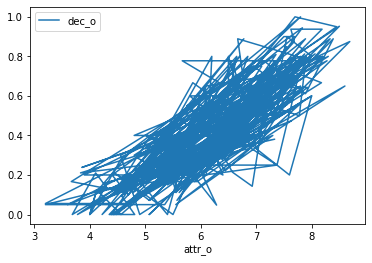

In [292]:
sd_grouped_by_id_mean.plot(x = 'attr_o', y = 'dec_o' )

In [293]:
print(sd_grouped_by_id_mean.fun_o.mean())
print(sd_grouped_by_id_std.fun_o.mean())

6.421837397905274
1.677656611769442


In [294]:
sd_grouped_by_id_mean

,id,gender,idg,condtn,wave,round,position,positin1,order,partner,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
iid,,,,,,,,,,,,,,,,,,,,,
1,1.0,0.0,1.0,1.0,1.0,10.0,7.0,NaN,5.500000,5.5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,2.0,0.0,3.0,1.0,1.0,10.0,3.0,NaN,5.500000,5.5,...,7.0,6.0,9.0,9.0,4.0,NaN,NaN,NaN,NaN,NaN
3,3.0,0.0,5.0,1.0,1.0,10.0,9.0,NaN,5.500000,5.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,0.0,7.0,1.0,1.0,10.0,6.0,NaN,5.500000,5.5,...,6.0,5.0,6.0,8.0,5.0,NaN,NaN,NaN,NaN,NaN
5,5.0,0.0,9.0,1.0,1.0,10.0,4.0,NaN,5.500000,5.5,...,4.0,5.0,10.0,6.0,10.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348,8.0,0.0,15.0,2.0,14.0,18.0,16.0,16.0,9.500000,9.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
349,9.0,0.0,17.0,2.0,14.0,18.0,7.0,7.0,9.500000,9.5,...,8.0,8.0,9.0,8.0,7.0,9.0,5.0,6.0,8.0,7.0
350,10.0,0.0,19.0,2.0,14.0,18.0,3.0,3.0,9.500000,9.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [298]:
sd_grouped_by_id_mean['dec_o_std'] = sd_grouped_by_id_std['dec_o']
sd_grouped_by_id_mean['fun_o_std'] = sd_grouped_by_id_std['fun_o']

In [299]:
sd_grouped_by_id_mean = sd_grouped_by_id_mean.reset_index()

In [300]:
sd_grouped_by_id_mean

,index,iid,id,gender,idg,condtn,wave,round,position,positin1,...,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3,dec_o_std,fun_o_std
0,0,1,1.0,0.0,1.0,1.0,1.0,10.0,7.0,NaN,...,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,2.0,0.0,3.0,1.0,1.0,10.0,3.0,NaN,...,9.0,9.0,4.0,NaN,NaN,NaN,NaN,NaN,0.527046,1.475730
2,2,3,3.0,0.0,5.0,1.0,1.0,10.0,9.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.516398,2.321398
3,3,4,4.0,0.0,7.0,1.0,1.0,10.0,6.0,NaN,...,6.0,8.0,5.0,NaN,NaN,NaN,NaN,NaN,0.527046,1.932184
4,4,5,5.0,0.0,9.0,1.0,1.0,10.0,4.0,NaN,...,10.0,6.0,10.0,NaN,NaN,NaN,NaN,NaN,0.516398,1.715938
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,346,348,8.0,0.0,15.0,2.0,14.0,18.0,16.0,16.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.427793,1.464169
347,347,349,9.0,0.0,17.0,2.0,14.0,18.0,7.0,7.0,...,9.0,8.0,7.0,9.0,5.0,6.0,8.0,7.0,0.235702,1.521278
348,348,350,10.0,0.0,19.0,2.0,14.0,18.0,3.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.235702,1.804814
349,349,351,11.0,0.0,21.0,2.0,14.0,18.0,11.0,11.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.485071,1.447615


In [317]:
sd_grouped_by_id_mean['index_str'] = sd_grouped_by_id_mean['index'].apply(lambda x : str(x))

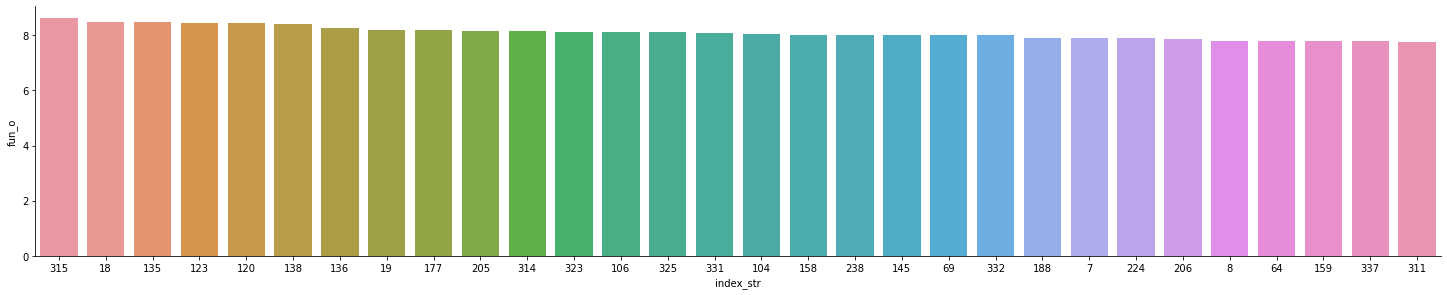

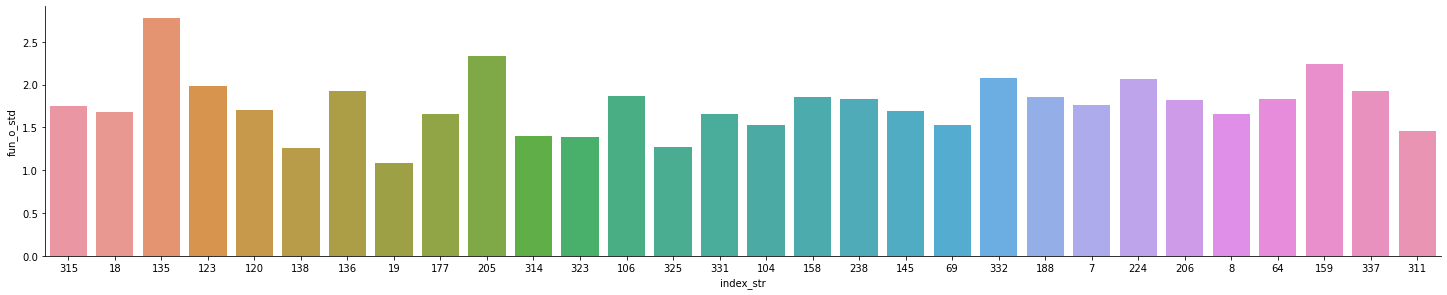

In [341]:
sns.catplot(x = 'index_str', y = 'fun_o', data = sd_grouped_by_id_mean.sort_values(by = 'fun_o', ascending = False).iloc[:30,:], kind = 'bar', height = 4, aspect = 5)
sns.catplot(x = 'index_str', y = 'fun_o_std', data = sd_grouped_by_id_mean.sort_values(by = 'fun_o', ascending = False).iloc[:30,:], kind = 'bar', height = 4, aspect = 5)

In [312]:
sd_grouped_by_id_mean.sort_values(by = 'fun_o', ascending = False).iloc[:20,40:70]

,date,go_out,career_c,sports,tvsports,exercise,dining,museums,art,hiking,...,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1
315,4.0,1.0,7.0,8.0,1.0,5.0,10.0,6.0,10.0,4.0,...,7.0,NaN,50.00,0.00,20.00,20.00,0.00,10.00,40.0,0.0
18,1.0,1.0,7.0,10.0,10.0,10.0,10.0,5.0,5.0,6.0,...,10.0,20.0,50.00,0.00,25.00,10.00,0.00,15.00,NaN,NaN
135,4.0,1.0,8.0,6.0,1.0,8.0,8.0,4.0,4.0,1.0,...,7.0,NaN,17.39,17.39,15.22,17.39,13.04,19.57,9.0,6.0
123,3.0,1.0,4.0,3.0,1.0,9.0,10.0,9.0,10.0,1.0,...,6.0,4.0,20.00,15.00,20.00,15.00,12.00,18.00,NaN,NaN
120,3.0,1.0,1.0,7.0,9.0,7.0,9.0,7.0,6.0,5.0,...,6.0,10.0,40.00,15.00,10.00,20.00,5.00,10.00,NaN,NaN
138,5.0,2.0,7.0,8.0,6.0,8.0,9.0,5.0,5.0,5.0,...,6.0,NaN,18.60,16.28,18.60,18.60,11.63,16.28,7.0,9.0
136,3.0,2.0,7.0,7.0,2.0,9.0,8.0,6.0,6.0,1.0,...,6.0,NaN,20.00,20.00,20.00,20.00,6.67,13.33,9.0,9.0
19,1.0,1.0,7.0,10.0,10.0,10.0,10.0,9.0,9.0,4.0,...,6.0,19.0,100.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN
177,6.0,3.0,2.0,5.0,5.0,10.0,10.0,7.0,7.0,5.0,...,2.0,NaN,19.15,21.28,17.02,17.02,12.77,12.77,7.0,10.0
205,3.0,1.0,1.0,10.0,8.0,8.0,7.0,5.0,5.0,2.0,...,6.0,NaN,17.31,13.46,17.31,19.23,19.23,13.46,9.0,9.0


<AxesSubplot:xlabel='fun_o', ylabel='dec_o'>

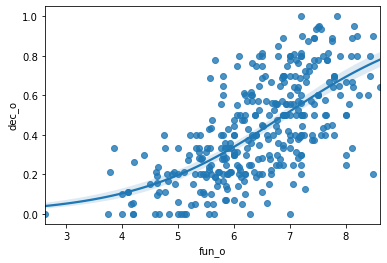

In [344]:
sns.regplot(x = 'fun_o', y = 'dec_o', data = sd_grouped_by_id_mean, logistic = True)

<AxesSubplot:xlabel='shar_o', ylabel='dec_o'>

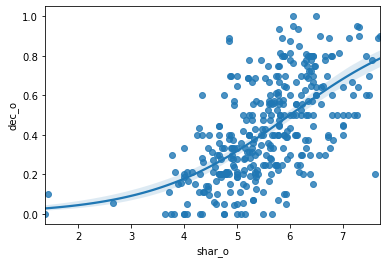

In [345]:
sns.regplot(x = 'shar_o', y = 'dec_o', data = sd_grouped_by_id_mean, logistic = True)

<AxesSubplot:xlabel='like_o', ylabel='dec_o'>

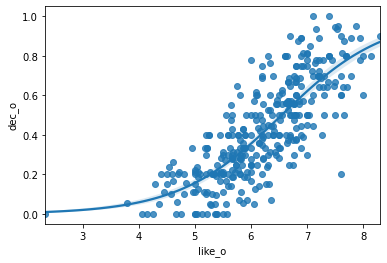

In [346]:
sns.regplot(x = 'like_o', y = 'dec_o', data = sd_grouped_by_id_mean, logistic = True)

<AxesSubplot:xlabel='like_o', ylabel='dec_o'>

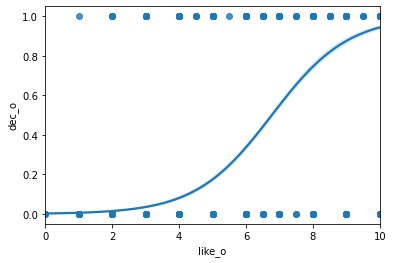

In [354]:
sns.regplot(x = 'like_o', y = 'dec_o', data = speed_dating, logistic = True)

# Visualize imprtance of partner's characteristics

In [351]:
speed_dating.imprace.describe()

count    5154.000000
mean        3.803454
std         2.874903
min         1.000000
25%         1.000000
50%         3.000000
75%         6.000000
max        10.000000
Name: imprace, dtype: float64

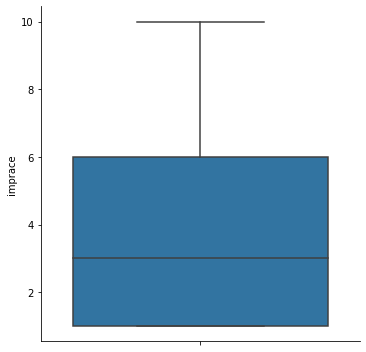

In [353]:
sns.catplot( y = 'imprace', kind= 'box', data = speed_dating)

## Significant on match ?

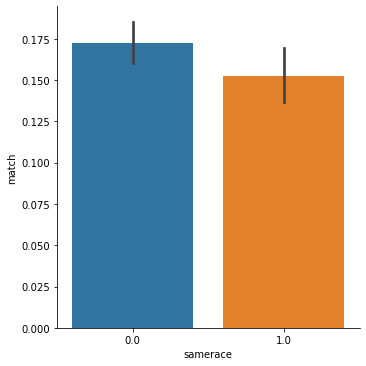

In [382]:
sns.catplot(x = 'samerace', y = 'match', data = speed_dating, kind = 'bar'  )

being from the same race seems less interesting for maching, but confidence intervals show we cannot say that it is significant

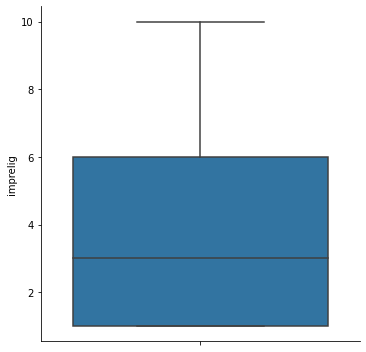

In [355]:
sns.catplot( y = 'imprelig', kind= 'box', data = speed_dating)

In [ ]:
sns.catplot(x = 'samerace', y = 'match', data = speed_dating, kind = 'bar'  )

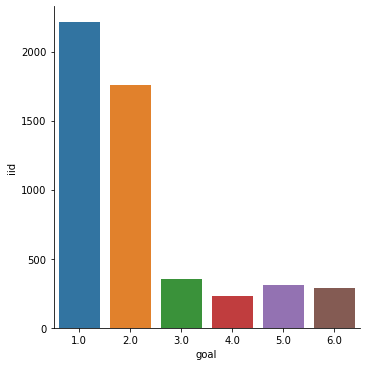

In [361]:
sns.catplot(x = 'goal', y = 'iid', data = speed_dating.groupby('goal').count().reset_index(), kind = 'bar'  )

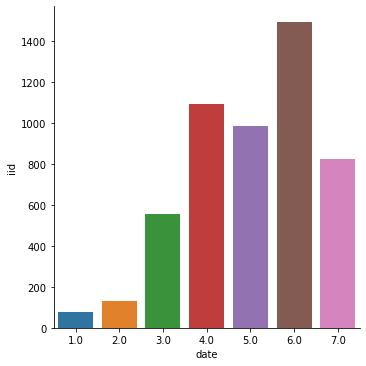

In [363]:
sns.catplot(x = 'date', y = 'iid', data = speed_dating.groupby('date').count().reset_index(), kind = 'bar'  )

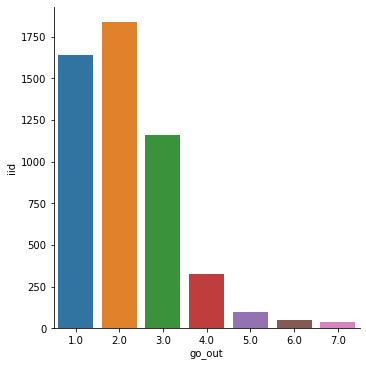

In [364]:
sns.catplot(x = 'go_out', y = 'iid', data = speed_dating.groupby('go_out').count().reset_index(), kind = 'bar'  )

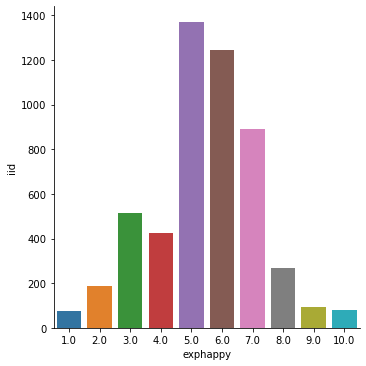

In [368]:
sns.catplot(x = 'exphappy', y = 'iid', data = speed_dating.groupby('exphappy').count().reset_index(), kind = 'bar'  )

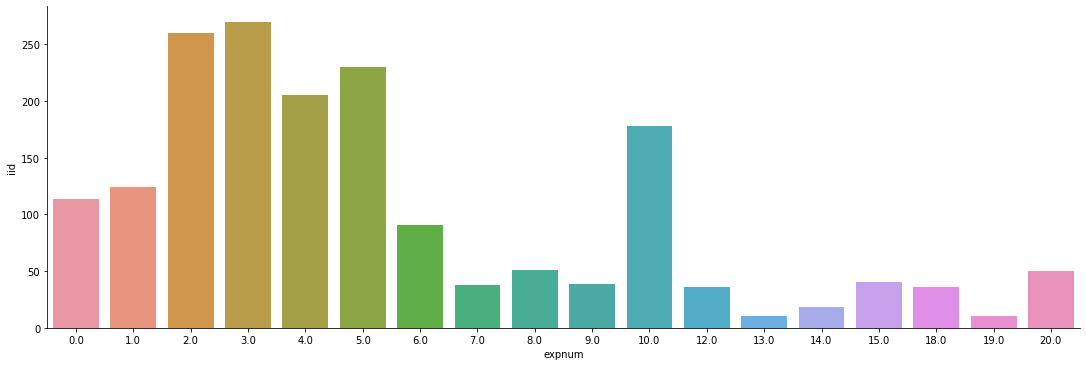

In [371]:
sns.catplot(x = 'expnum', y = 'iid', data = speed_dating.groupby('expnum').count().reset_index(), kind = 'bar', height = 5, aspect = 3)

### seems like a 'normal' distribution before 7 but a pike at 10 ! high expectators
let's see if there is a link between a high target and match rate :

<AxesSubplot:xlabel='expnum', ylabel='match'>

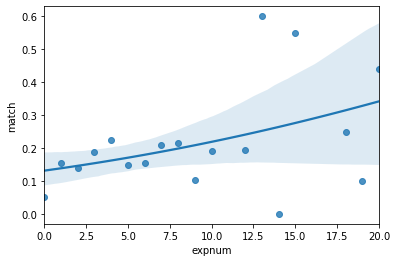

In [375]:
sns.regplot(x = speed_dating.groupby('expnum').count().reset_index().expnum, y = speed_dating.groupby('expnum').mean().reset_index().match, logistic = True)

Not really... Let's look at dec_o :

<AxesSubplot:xlabel='expnum', ylabel='dec_o'>

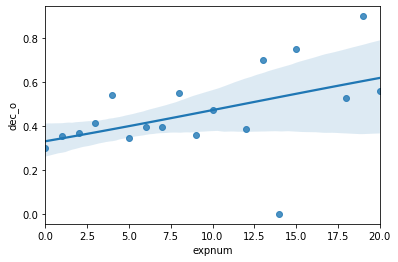

In [378]:
sns.regplot(x = speed_dating.groupby('expnum').count().reset_index().expnum, y = speed_dating.groupby('expnum').mean().reset_index().dec_o,  logistic = True)

Better ! a high target helps a lot (except outlier at 14)

<AxesSubplot:xlabel='int_corr', ylabel='match'>

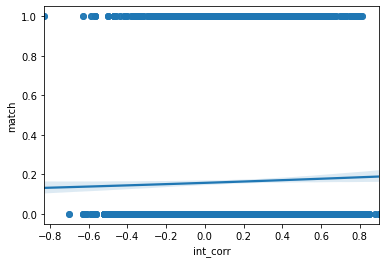

In [383]:
sns.regplot(x = 'int_corr' , y = 'match', data = speed_dating,  logistic = True)

## observation impact age

In [387]:
speed_dating['diff_age'] = speed_dating['age'] - speed_dating['age_o']
speed_dating['diff_age'] = speed_dating['diff_age'].apply(lambda x : (x**2)**(1/2))

<AxesSubplot:xlabel='diff_age', ylabel='match'>

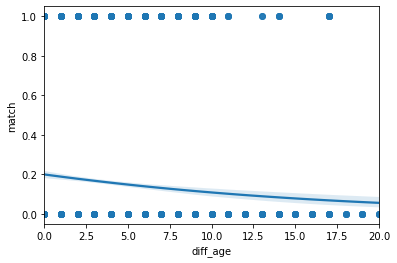

In [388]:
sns.regplot(x = 'diff_age' , y = 'match', data = speed_dating,  logistic = True)

Une certaine corrélation avec la différence d'age

# Création du DF 'perso'

In [399]:
features_perso = ['iid', 'gender', 'idg', 'age', 'field', 'field_cd', 'race', 'imprace', 'imprelig', 'from', 'zipcode', 'goal', 'date', 'go_out', 'career', 'career_c', 'exphappy', 'expnum', 'attr1_1', 'attr4_1', 'attr2_1', 'attr3_1', 'attr5_1']
# as attractivity is the main feature for decision, we only take it (among sinc, intel, etc) due to lack of time

speed_dating[features_perso].head()

,iid,gender,idg,age,field,field_cd,race,imprace,imprelig,from,...,go_out,career,career_c,exphappy,expnum,attr1_1,attr4_1,attr2_1,attr3_1,attr5_1
0,1,0,1,21.0,Law,1.0,4.0,2.0,4.0,Chicago,...,1.0,lawyer,NaN,3.0,2.0,15.0,NaN,35.0,6.0,NaN
1,1,0,1,21.0,Law,1.0,4.0,2.0,4.0,Chicago,...,1.0,lawyer,NaN,3.0,2.0,15.0,NaN,35.0,6.0,NaN
2,1,0,1,21.0,Law,1.0,4.0,2.0,4.0,Chicago,...,1.0,lawyer,NaN,3.0,2.0,15.0,NaN,35.0,6.0,NaN
3,1,0,1,21.0,Law,1.0,4.0,2.0,4.0,Chicago,...,1.0,lawyer,NaN,3.0,2.0,15.0,NaN,35.0,6.0,NaN
4,1,0,1,21.0,Law,1.0,4.0,2.0,4.0,Chicago,...,1.0,lawyer,NaN,3.0,2.0,15.0,NaN,35.0,6.0,NaN


In [401]:
sd_group_iid = speed_dating[features_perso].groupby('iid').mean().reset_index()


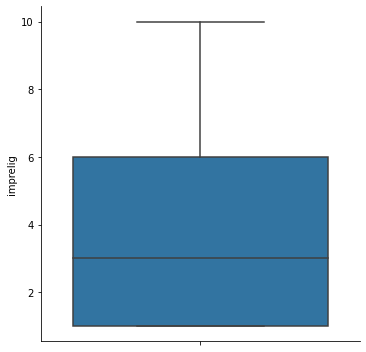

In [404]:
sns.catplot( y = 'imprelig', kind= 'box', data = sd_group_iid)

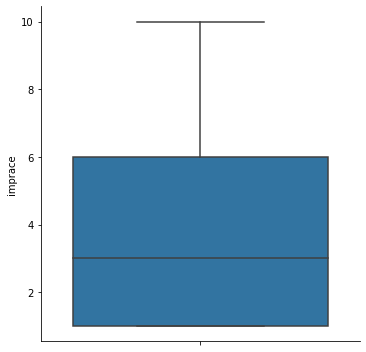

In [406]:
sns.catplot( y = 'imprace', kind= 'box', data = sd_group_iid)

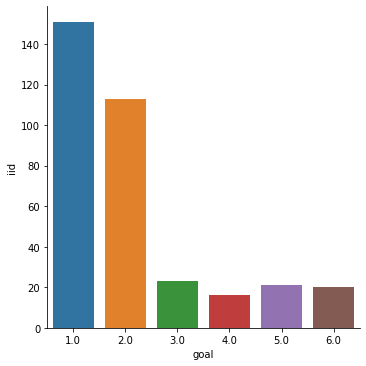

In [408]:
sns.catplot(x = 'goal', y = 'iid', data = sd_group_iid.groupby('goal').count().reset_index(), kind = 'bar'  )

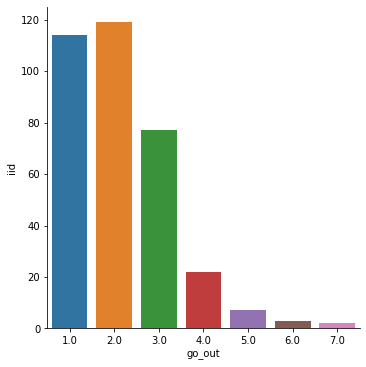

In [409]:
sns.catplot(x = 'go_out', y = 'iid', data = sd_group_iid.groupby('go_out').count().reset_index(), kind = 'bar'  )

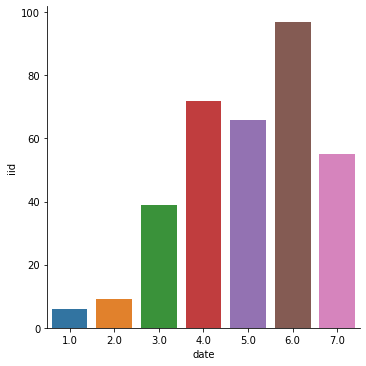

In [410]:
sns.catplot(x = 'date', y = 'iid', data = sd_group_iid.groupby('date').count().reset_index(), kind = 'bar'  )

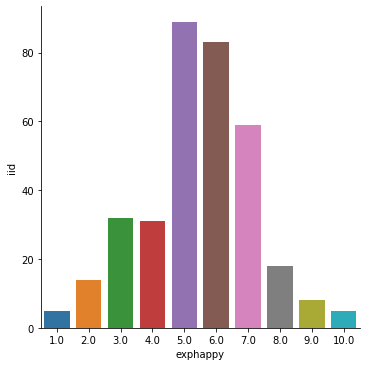

In [411]:
sns.catplot(x = 'exphappy', y = 'iid', data = sd_group_iid.groupby('exphappy').count().reset_index(), kind = 'bar'  )

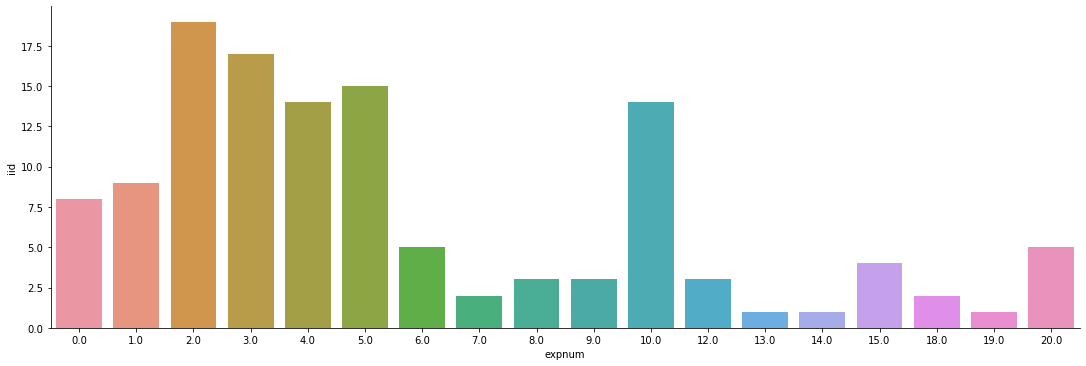

In [412]:
sns.catplot(x = 'expnum', y = 'iid', data = sd_group_iid.groupby('expnum').count().reset_index(), kind = 'bar', height = 5, aspect = 3)